<a href="https://colab.research.google.com/github/CALORIO-Jeff-Klien/Simulation-PIT/blob/main/Chapter_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# standard_brownian_motion.py

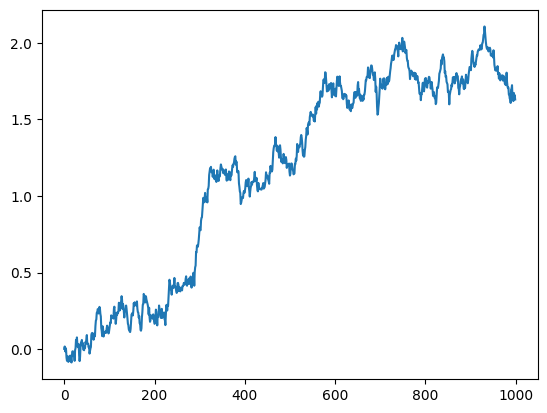

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(4)

n = 1000

sqn = 1 / np.sqrt(n)

z_values = np.random.randn(n)

Yk = 0

sb_motion=list()

for k in range(n):
    Yk = Yk + sqn*z_values[k]
    sb_motion.append(Yk)

plt.plot(sb_motion)
plt.show()


# amazon_stock_montecarlo_simulation.py

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2012-10-03 to 2022-09-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2515 non-null   float64
 1   High       2515 non-null   float64
 2   Low        2515 non-null   float64
 3   Close      2515 non-null   float64
 4   Adj Close  2515 non-null   float64
 5   Volume     2515 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.5 KB
None
               Open     High      Low    Close  Adj Close    Volume
Date                                                               
2012-10-03  12.5605  12.8050  12.4780  12.7960    12.7960  54912000
2012-10-04  12.8005  13.0760  12.7935  13.0235    13.0235  54008000
2012-10-05  13.0600  13.0950  12.8745  12.9255    12.9255  56130000
2012-10-08  12.8835  12.9900  12.7780  12.9530    12.9530  35246000
2012-10-09  12.9335  12.9675  12.5365  12.5480    12.5480  69896000
                  Open 

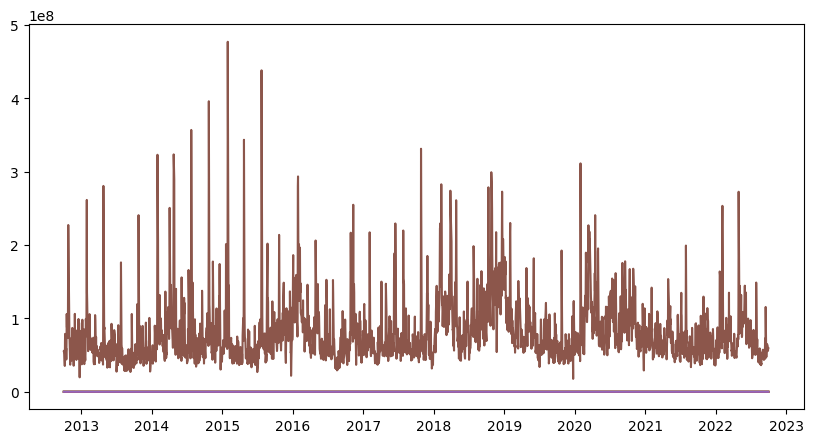

Date
2022-09-19    0.009106
2022-09-20   -0.020013
2022-09-21   -0.030327
2022-09-22   -0.010430
2022-09-23   -0.030553
2022-09-26    0.011969
2022-09-27   -0.006447
2022-09-28    0.030981
2022-09-29   -0.027578
2022-09-30   -0.015804
Name: Close, dtype: float64


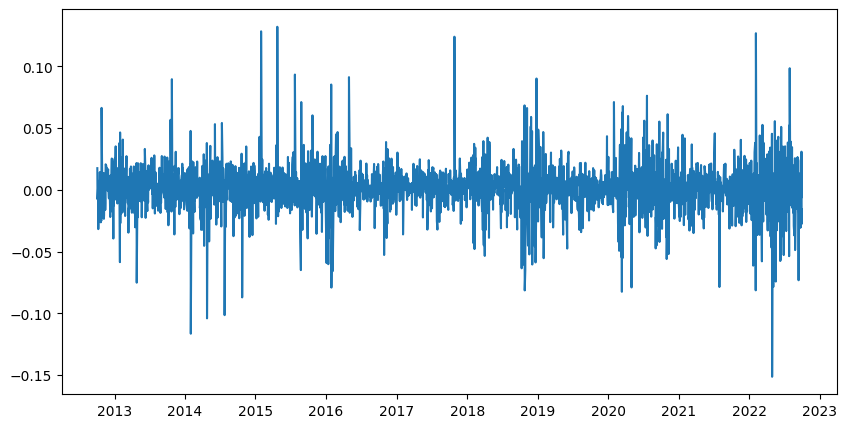

Drift =  0.000664302439952529


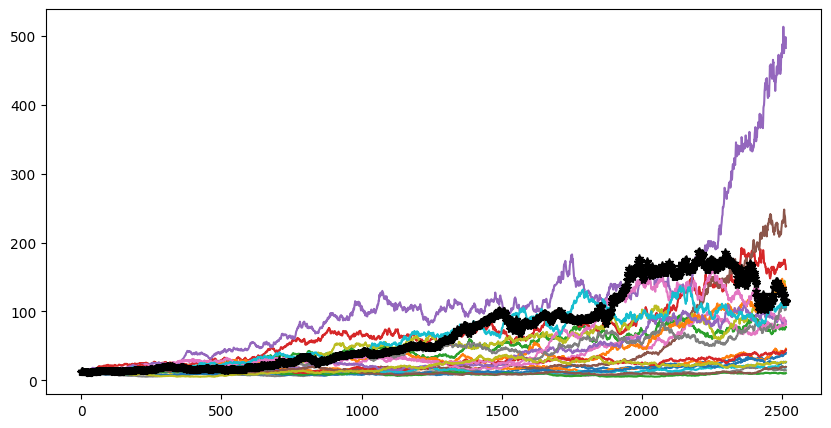

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Removed usecols=['Date', 'Close'] to load all columns and diagnose the actual column names
AmznData = pd.read_csv("/content/drive/MyDrive/DATA/AMZN.csv",header=0, parse_dates=True,index_col='Date')
print(AmznData.info())
print(AmznData.head())
print(AmznData.tail())
print(AmznData.describe())

plt.figure(figsize=(10,5))
plt.plot(AmznData)
plt.show()

AmznDataPctChange = AmznData['Close'].pct_change()

AmznLogReturns = np.log(1 + AmznDataPctChange)
print(AmznLogReturns.tail(10))

plt.figure(figsize=(10,5))
plt.plot(AmznLogReturns)
plt.show()

MeanLogReturns = np.array(AmznLogReturns.mean())

VarLogReturns = np.array(AmznLogReturns.var())

StdevLogReturns = np.array(AmznLogReturns.std())


Drift = MeanLogReturns - (0.5 * VarLogReturns)
print("Drift = ",Drift)

NumIntervals = 2515

Iterations = 20

np.random.seed(7)
SBMotion = norm.ppf(np.random.rand(NumIntervals, Iterations))



DailyReturns = np.exp(Drift + StdevLogReturns * SBMotion)


StartStockPrices = AmznData['Close'].iloc[0]

StockPrice = np.zeros_like(DailyReturns)

StockPrice[0] = StartStockPrices

for t in range(1, NumIntervals):

    StockPrice[t] = StockPrice[t - 1] * DailyReturns[t]



plt.figure(figsize=(10,5))

plt.plot(StockPrice)

AMZNTrend = np.array(AmznData.iloc[:, 0:1])

plt.plot(AMZNTrend,'k*')

plt.show()

# value_at_risk.py

/tmp/ipython-input-3535788352.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(StockList, start=StartDay, end=EndDay)
[*********************100%***********************]  6 of 6 completed


             ADBE        CSCO         HPQ         IBM        MSFT        NVDA
count  251.000000  251.000000  251.000000  251.000000  251.000000  251.000000
mean   560.587969   46.823288   26.129984  107.593802  265.795897   19.438760
std     76.331620    4.196873    2.860608    7.383323   36.115528    5.840444
min    421.200012   38.239323   20.583456   92.169518  203.662323   11.560740
25%    488.220001   44.993097   24.398903  101.329376  234.531403   14.276416
50%    569.359985   47.239452   25.708994  110.387955  267.029419   19.162643
75%    632.470001   49.637587   27.612720  113.886604  291.183823   22.186301
max    688.369995   56.807392   33.388424  120.489120  331.987335   33.307392


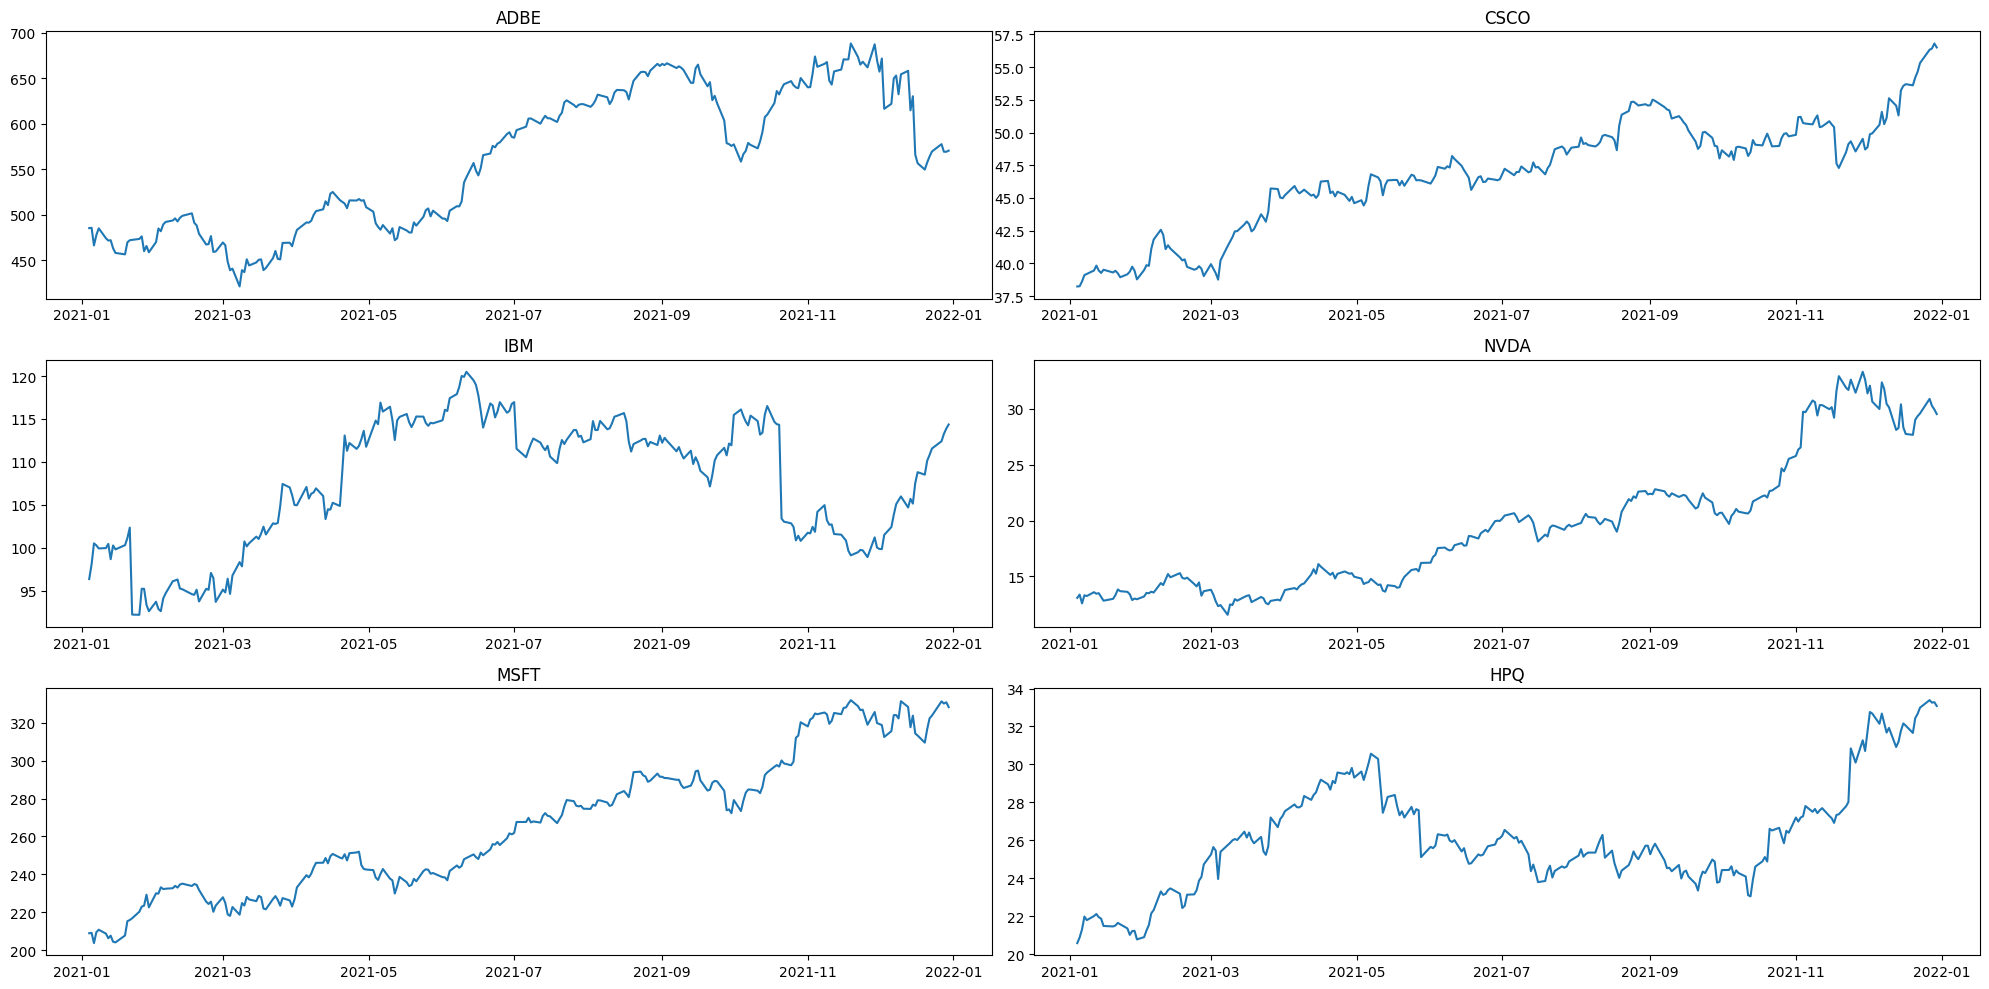

                ADBE      CSCO       HPQ       IBM      MSFT      NVDA
Date                                                                  
2021-12-09 -0.031435  0.009295 -0.015254  0.004471 -0.005583 -0.041978
2021-12-10  0.034589  0.029539  0.007746  0.004208  0.028340 -0.009577
2021-12-13  0.005883 -0.010802 -0.031568 -0.012169 -0.009167 -0.067455
2021-12-14 -0.065988 -0.014332  0.009070  0.009626 -0.032587  0.006250
2021-12-15  0.025160  0.037390  0.018539 -0.005252  0.019218  0.074884
2021-12-16 -0.101915  0.006341  0.012135  0.022906 -0.029135 -0.068026
2021-12-17 -0.016693  0.002487 -0.003542  0.011673 -0.003386 -0.020643
2021-12-20 -0.012342 -0.001654 -0.012031 -0.002669 -0.012013 -0.002950
2021-12-21  0.014097  0.011100  0.024633  0.015032  0.023069  0.048920
2021-12-22  0.011587  0.008193  0.007023  0.006048  0.018058  0.011178
2021-12-23  0.010000  0.012189  0.009925  0.006782  0.004471  0.008163
2021-12-27  0.014150  0.018304  0.011952  0.007579  0.023186  0.044028
2021-1

In [28]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf
import pandas as pd  # Import pandas for MultiIndex operations

# Stock selection
StockList = ['ADBE', 'CSCO', 'IBM', 'NVDA', 'MSFT', 'HPQ']
StartDay = dt.datetime(2021, 1, 1)
EndDay = dt.datetime(2021, 12, 31)

# Download Price Data
data = yf.download(StockList, start=StartDay, end=EndDay)
StockData = data

# Select Only Close Prices
StockClose = StockData['Close']

# Flatten Index if MultiIndex occurs
if isinstance(StockClose.columns, pd.MultiIndex):
    StockClose.columns = StockClose.columns.get_level_values(0)

StockClose.columns.name = None

# Display Summary Statistics
print(StockClose.describe())

# Plot Stock Closing Prices
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
axs[0, 0].plot(StockClose['ADBE']); axs[0, 0].set_title('ADBE')
axs[0, 1].plot(StockClose['CSCO']); axs[0, 1].set_title('CSCO')
axs[1, 0].plot(StockClose['IBM']); axs[1, 0].set_title('IBM')
axs[1, 1].plot(StockClose['NVDA']); axs[1, 1].set_title('NVDA')
axs[2, 0].plot(StockClose['MSFT']); axs[2, 0].set_title('MSFT')
axs[2, 1].plot(StockClose['HPQ']); axs[2, 1].set_title('HPQ')

plt.tight_layout()
plt.show()

# Compute Daily Returns
StockReturns = StockClose.pct_change()
print(StockReturns.tail(15))

# VaR Parameters
PortfolioValue = 1000000000.00  # Example 1 Billion
ConfidenceValue = 0.95

# Mean & Standard Deviation of Daily Returns
MeanStockRet = StockReturns.mean()
StdStockRet = StockReturns.std()

# Annualize
WorkingDays2021 = 252.
AnnualizedMeanStockRet = MeanStockRet / WorkingDays2021
AnnualizedStdStockRet = StdStockRet / np.sqrt(WorkingDays2021)

# Compute VaR using Normal Distribution
INPD = norm.ppf(1 - ConfidenceValue, AnnualizedMeanStockRet, AnnualizedStdStockRet)
VaR = PortfolioValue * INPD

# Round Results (use np.round instead of np.round_)
RoundVaR = np.round(VaR, 2)

# Display Results
for i in range(len(StockList)):
    print(f"Value-at-Risk for {StockList[i]} is equal to {RoundVaR[i]}")
